<a href="https://colab.research.google.com/github/AndresBeta123/PruebasIas/blob/main/Sklearn/ProyectoRegresionLinear_DatosMedicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importaciones

In [ ]:
!pip install regressors
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from regressors import stats

sns.set(style='darkgrid',context='notebook')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Importando los datos

In [ ]:
df = pd.read_csv('https://github.com/AndresBeta123/PruebasIas/blob/main/Sklearn/insurance.csv?raw=true')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Analizis de datos

(1338, 7)


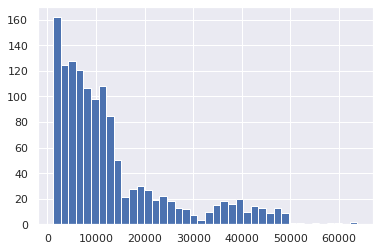

In [ ]:
print(df.shape)
df.charges.hist(bins = 40)

In [ ]:
df[df.charges>50000]
df = df[df.charges<50000]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


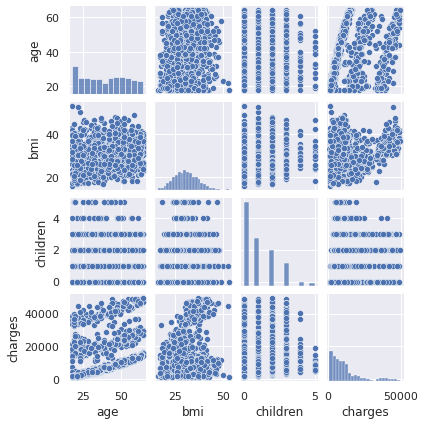

In [ ]:
sns.pairplot(df,height=1.5)
plt.show()

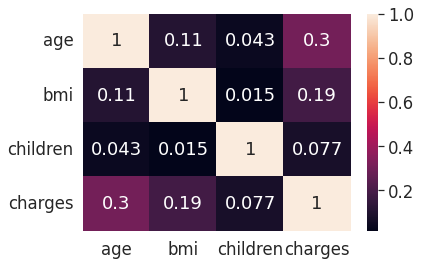

In [ ]:
numeric_cols =['age','bmi','children','charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=numeric_cols,xticklabels=numeric_cols)

In [ ]:
##Aqui se esta haciendo un onehotencoder (osea pasar las variables categoricas a representaciones
#en este caso)
df = pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


###Creando el modelo

In [ ]:
x_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

x = df[x_cols].values
y = df[y_col].values

#dividiendo los datos
x_train,x_test,y_train,y_test = train_test_split(x,y)

#normalizando
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test  = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test  = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [ ]:
y_pred.shape

(333, 1)

###Probando el modelo

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print("R2",r2.round(4))
print("mse",mse.round(4))

R2 0.7333
mse 0.2776


In [ ]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
y_test = y_test.reshape(-1)
print("RESUMEN")
stats.summary(model,x_test,y_test,x_cols)

RESUMEN
Residuals:
 Min     1Q  Median     3Q    Max
-2.1 -0.138  0.0744 0.2289 0.9108


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.008810    0.028942  -0.3044  0.761014
region_northwest -0.006683    0.034363  -0.1945  0.845926
age               0.328840    0.029896  10.9993  0.000000
children          0.055417    0.028051   1.9756  0.049030
sex_male          0.013200    0.029122   0.4533  0.650654
region_southeast -0.041033    0.034420  -1.1921  0.234058
smoker_yes        0.793367    0.029142  27.2239  0.000000
bmi               0.165773    0.031134   5.3245  0.000000
region_southwest -0.036716    0.033962  -1.0811  0.280454
---
R-squared:  0.73326,    Adjusted R-squared:  0.72667
F-statistic: 111.33 on 8 features


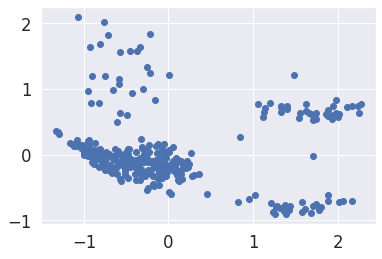

In [ ]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.show()

###Segundo modelo con los datos arreglados

In [ ]:
df2 = df.copy()
df2['age2'] = df2.age**2
df2['sobrepeso'] = (df2.bmi >= 30).astype(int)
df2['sobrepeso*fumador'] = df2.sobrepeso*df2.smoker_yes

In [ ]:
#x_cols = list(set(df2.columns)-set(['charges']))
x_cols = ['sobrepeso*fumador','smoker_yes','age2','children']
y_col = ['charges']

x = df2[x_cols].values
y = df2[y_col].values

#dividiendo los datos
x_train,x_test,y_train,y_test = train_test_split(x,y)

#normalizando
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test  = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test  = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print("R2",r2.round(4))
print("mse",mse.round(4))
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)
print("RESUMEN")
stats.summary(model,x_test,y_test,x_cols)

R2 0.8064
mse 0.1897
RESUMEN
Residuals:
    Min     1Q  Median     3Q    Max
-1.9371 0.0651  0.1133 0.1366 0.4343


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.023945   0.0000  1.000000
sobrepeso*fumador  0.490761    0.031882  15.3931  0.000000
smoker_yes         0.465394    0.030143  15.4398  0.000000
age2               0.313357    0.025034  12.5174  0.000000
children           0.062230    0.024455   2.5447  0.011389
---
R-squared:  0.80644,    Adjusted R-squared:  0.80408
F-statistic: 341.64 on 4 features


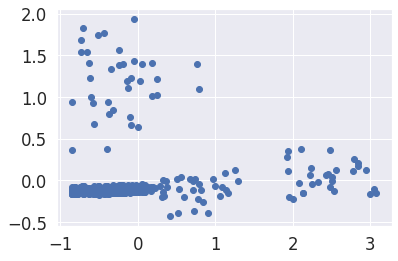

In [ ]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.show()